In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from datasets import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mist = load_dataset('turkish_product_reviews', split = "train")

ModuleNotFoundError: No module named 'datasets'

In [36]:
mist.data.shape # kaç data olduğuna bakıyoruz

AttributeError: 'DataFrame' object has no attribute 'data'

In [5]:
def showimage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

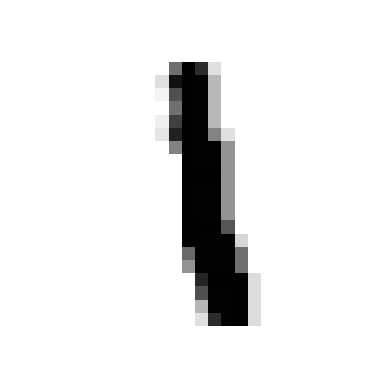

In [10]:
showimage(mist.data,6)

# Data'yı bölüyoruz test ve training olarak

In [11]:
train_img, test_img, train_lbl, test_lbl = train_test_split( mist.data,mist.target,test_size=1/7.0,random_state=0)

In [12]:
type(train_img)

pandas.core.frame.DataFrame

In [13]:
test_img_copy = test_img.copy()

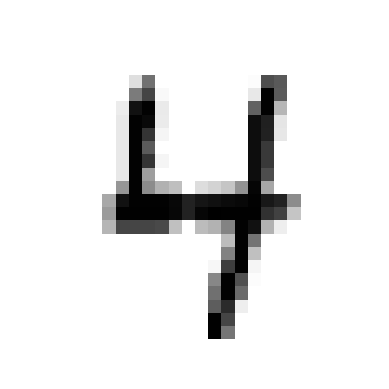

In [16]:
showimage(test_img_copy, 1)

# Verileri scale edeceğiz
Çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor bu nedenle mutlaka scaling işleminden geçiriyoruz BU amaçla da StandardScaler kullanıoyruz

In [17]:
scaler = StandardScaler()

# Scaler'i sadece training set üzerinde fit yapmamız yeterli.
scaler.fit(train_img)

# Ama transform işlemini hem tarining sete hem de test sete yapmamız gerekiyor
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

# PCA İşlemini uyguluyoruz
varlance'ın %95 oranında korunmasnı istediğimizi belirtiyoruz

In [18]:
pca = PCA(.95)

In [19]:
pca.fit(train_img)

PCA(n_components=0.95)

In [20]:
# Bakalım 784 boyutu kaç boyuta düşürmüş
print(pca.n_components_)

327


In [22]:
# Şimdi transform işlemiyle hem train hem set verimizi 327 e düşürelim
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

# 2. Aşama
Şimdi 2. Makine Öğrenmesi modelimiz olan Logistic Regression modelimiz PCA işlemindengeçilirmiş veri setimiz üzerinde uygulayacağız

In [23]:
logisticReg = LogisticRegression(solver='lbfgs', max_iter=10000) # Default iter'i yazmazsak düşük kalabilir 

In [24]:
logisticReg.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

### Modelimiz eğitildi şimdi el yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekleştirelim

In [25]:
logisticReg.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

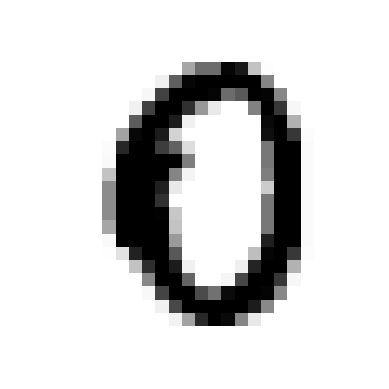

In [26]:
showimage(test_img_copy, 0)

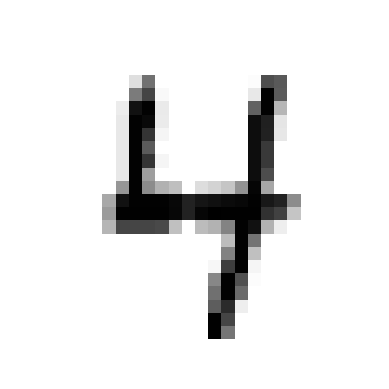

In [27]:
showimage(test_img_copy, 1)

In [29]:
logisticReg.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

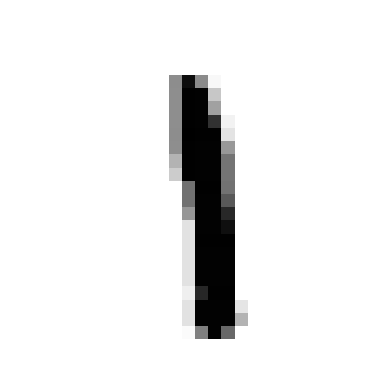

In [30]:
showimage(test_img_copy, 2)

In [31]:
logisticReg.predict(test_img[2].reshape(1,-1))

array(['1'], dtype=object)

### Doğruluk oranımıza bakalım

In [32]:
logisticReg.score(test_img, test_lbl)

0.9184